In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv('/content/Data set (3D printing).csv')

In [21]:
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


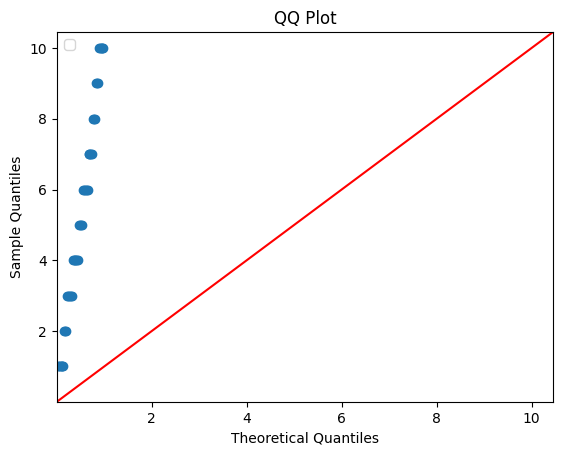

In [22]:
import statsmodels.api as sm
from scipy.stats import norm, uniform, gamma, expon, lognorm
import scipy.stats as stats
import scipy
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(data['wall_thickness'], uniform, line='45')
plt.title('QQ Plot')
plt.legend()
plt.show()

<ipython-input-23-4e2fa2811436>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['wall_thickness'])


<Axes: xlabel='wall_thickness', ylabel='Density'>

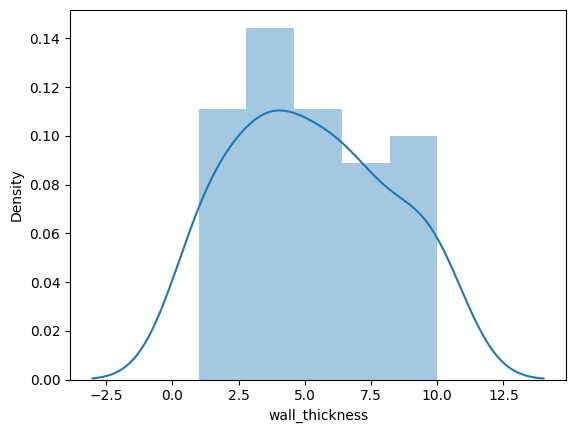

In [23]:
sns.distplot(data['wall_thickness'])

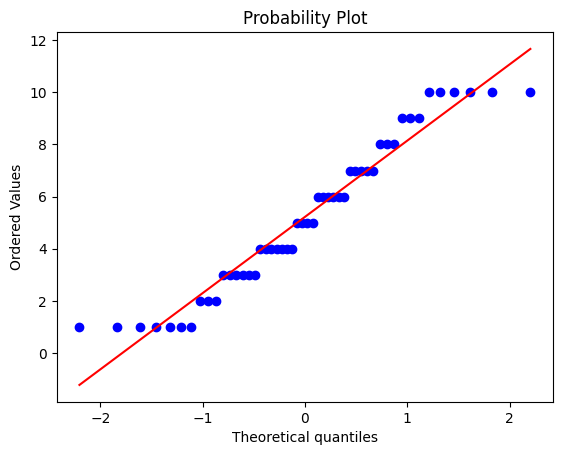

In [24]:
fig, ax = plt.subplots()
stats.probplot(data['wall_thickness'], plot=ax)
plt.show()

In [25]:
shape, loc, scale = lognorm.fit(data['wall_thickness'])
print(shape, loc, scale)

0.18021646056068286 -10.969514399443554 15.930533076304553


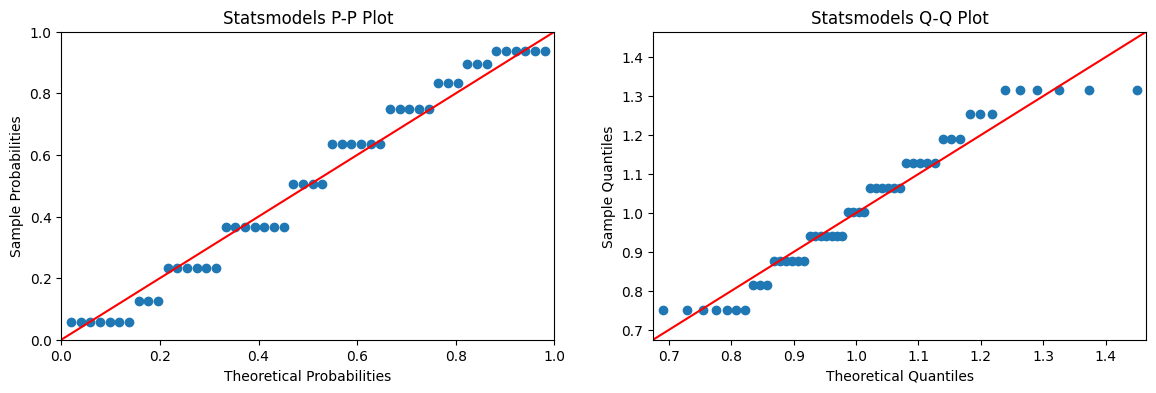

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
shape, loc, scale = lognorm.fit(data['wall_thickness'])
probplot = sm.ProbPlot(data['wall_thickness'], dist=stats.lognorm, fit=True, loc=loc, scale=scale, distargs=(shape,))
probplot.ppplot(line='45', ax=ax[0])
probplot.qqplot(line='45', ax=ax[1])
ax[0].set_title('Statsmodels P-P Plot')
ax[1].set_title('Statsmodels Q-Q Plot')
plt.show()

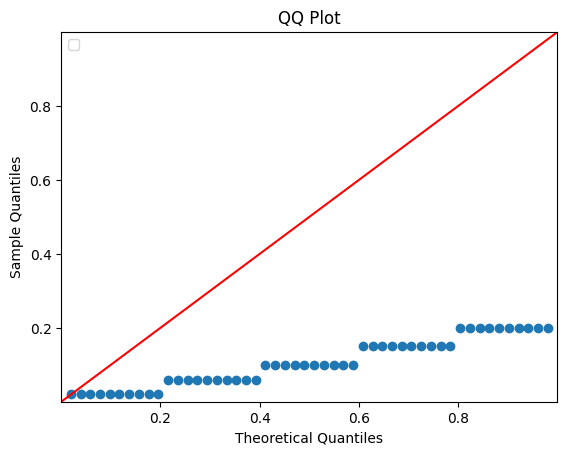

In [27]:
fig = sm.qqplot(data['layer_height'], uniform, line='45')
plt.title('QQ Plot')
plt.legend()
plt.show()

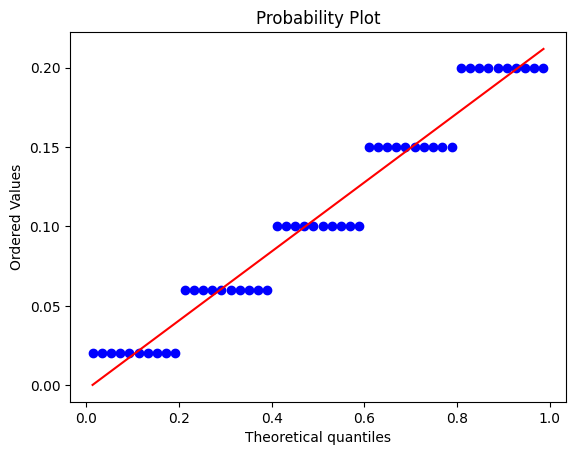

In [28]:
fig, ax = plt.subplots()
stats.probplot(data['layer_height'], dist = stats.uniform, plot=ax)
plt.show()

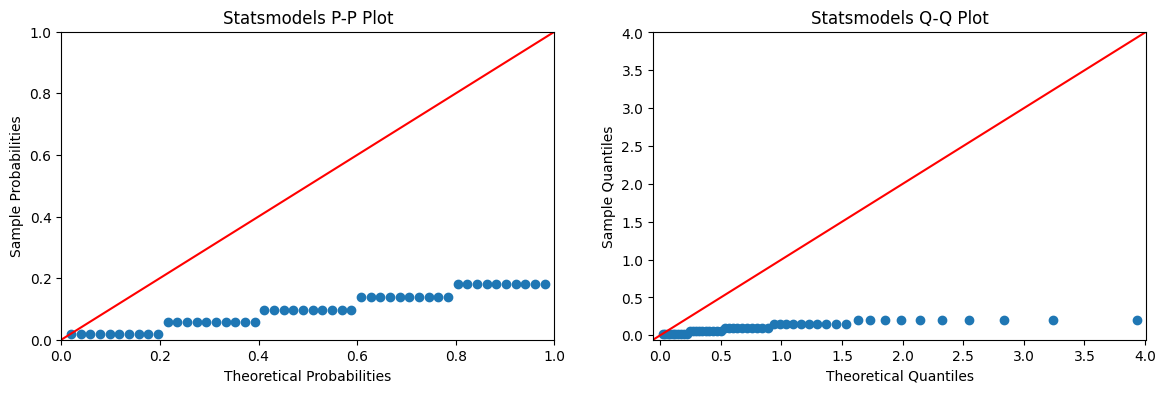

In [29]:
# fig, ax = plt.subplots()
# stats.probplot(data['tension_strenght'], plot=ax)
# probplot.pplot(line='45', ax=ax[0])
# plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
probplot = sm.ProbPlot(data['layer_height'],expon)
probplot.ppplot(line='45', ax=ax[0])
probplot.qqplot(line='45', ax=ax[1])
ax[0].set_title('Statsmodels P-P Plot')
ax[1].set_title('Statsmodels Q-Q Plot')
plt.show()

ConversionError: ignored

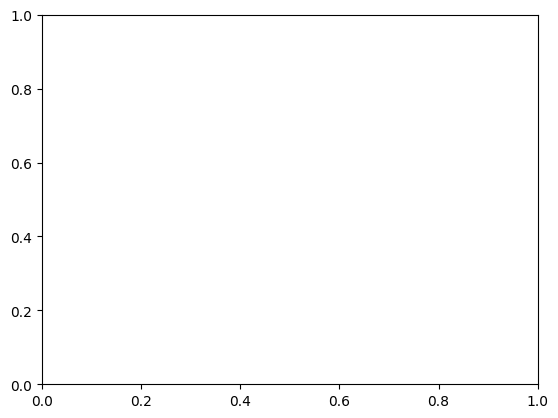

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, probplot

# Generate some random data

# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')

# Plot the uniform distribution
x = np.linspace(0, 1, 100)
plt.plot(x, uniform.pdf(x), 'r-', lw=2, label='Uniform PDF')

# Plot the pp plot
probplot(data, dist=uniform, plot=plt, fit=True, rvalue=True)
plt.title('PP plot')

# Plot the qq plot
# probplot(data, dist='uniform', plot=plt, fit=True, rvalue=True)
# plt.title('QQ plot')

# Show the plot
plt.legend()
plt.show()


In [ ]:
data['layer_height'].values

The data values clearly do not follow the red 45-degree line, which is an indication that they do not follow a normal distribution. So the feature "layer_height" follow uniform distribution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm

# plots for standard distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(data['layer_height'],kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(data['layer_height'],expon).ppplot(line='s', ax=ax[1])

In [ ]:
sns.distplot(data['layer_height'])

In [ ]:
from reliability.Probability_plotting import QQ_plot_parametric
from reliability.Distributions import Weibull_Distribution
import matplotlib.pyplot as plt
Field = Weibull_Distribution(alpha=350,beta=2.01)
Lab = Weibull_Distribution(alpha=128,beta=2.11)
QQ_plot_parametric(X_dist=Lab, Y_dist=Field)
plt.show()

In [ ]:
sm.qqplot(data['wall_thickness'],line='45',fit=True,dist=stats.weibull_min(10))
plt.show()

In [ ]:
data.head()

## Main code


In [ ]:
sns.distplot(data['elongation'])

## Normal Distribution

In [ ]:
fig, ax = fig, ax = plt.subplots(1, 2, figsize=(14, 4))
probplot = sm.ProbPlot(data['elongation'], dist = stats.norm, fit=True)
probplot.ppplot(line = '45', ax = ax[0])
probplot.qqplot(line = '45', ax = ax[1])
ax[0].set_title("Statsmodels P-P plot")
ax[1].set_title("Statsmodels Q-Q plot")
plt.show()

## Lognormal

In [ ]:
shape, loc, scale = lognorm.fit(data['elongation'])
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
probplot = sm.ProbPlot(data['elongation'], dist=stats.lognorm, fit=True, loc=loc, scale=scale, distargs=(shape,))
probplot.ppplot(line='45', ax=ax[0])
probplot.qqplot(line='45', ax=ax[1])
ax[0].set_title('Statsmodels P-P Plot')
ax[1].set_title('Statsmodels Q-Q Plot')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
probplot = sm.ProbPlot(np.log(data['elongation']), dist=stats.norm, fit=True)
probplot.ppplot(line='45', ax=ax[0])
probplot.qqplot(line='45', ax=ax[1])
ax[0].set_title('Statsmodels P-P Plot')
ax[1].set_title('Statsmodels Q-Q Plot')
plt.show()

## Uniform

In [ ]:
rng = np.random.default_rng()
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
res = stats.probplot(data['elongation'], dist = stats.uniform(), plot = ax[0])
res2 = sm.qqplot(data['elongation'], dist = stats.uniform(), ax = ax[1])
ax[0].set_title('Statsmodels P-P Plot')
ax[1].set_title('Statsmodels Q-Q Plot')
plt.show()